# Data Exploration 🔍

In [1]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import emoji
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Data/cleaned_by_language.csv")

Explore ratio of words to emojis

In [4]:
en_df = df[df['language'] == 'en']
es_df = df[df['language'] == 'es']

emoji_count_en = en_df['emoji count'].sum()
emoji_count_es = es_df['emoji count'].sum()

word_count_en = en_df['word count'].sum()
word_count_es = es_df['word count'].sum()

In [5]:
print("ratio of emojis to words (english): ", emoji_count_en/word_count_en)
print("ratio of emojis to words (spanish): ", emoji_count_es/word_count_es)

ratio of emojis to words (english):  0.2366223321991958
ratio of emojis to words (spanish):  0.2592716338122285


Explore what emojis are used

In [6]:
def get_df_count(lang_df):
    emojis = {}

    # create dictionary
    for row in lang_df['emoji list']:
        for el in row:
            emojis[el] = emojis.setdefault(el, 0) + 1

    # remove bad chars
    to_remove = ["'", ',', ' ', '[', ']']
    for el in to_remove:
        del emojis[el]
        
    # make dataframe
    emoji_arr = []
    for key, value in emojis.items():
        emoji_arr.append([key, value])

    emoji_df = pd.DataFrame(emoji_arr, columns=['emoji','count'])
    emoji_df = emoji_df.sort_values(by='count', ascending=False)

    return emoji_df

In [7]:
en_df_count = get_df_count(en_df)
es_df_count = get_df_count(es_df)

['😂', '🤣', '❤', '👏', '🔥', '😍', '😅', '🙌', '🏆', '🌈', '💀', '🤬', '🏳', '🏻', '♂', '0', '😉', '😫', '👎', '🤦']


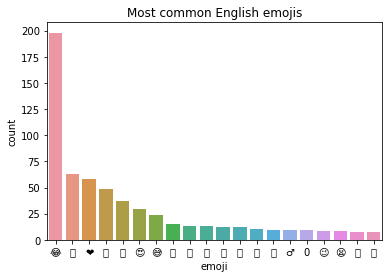

In [8]:
sns.barplot(x='emoji', y = 'count', data = en_df_count[:20]).set(title='Most common English emojis')
print(list(en_df_count[:20]['emoji']))

['😂', '🔥', '❤', '👏', '🙌', '😍', '😢', '🏼', '🏻', '0', '💙', '💪', '🏆', '⚽', '🤣', '🤫', '💚', '👍', 'f', '🤏']


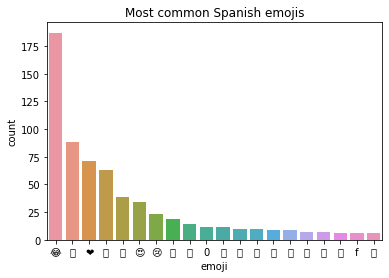

In [9]:
sns.barplot(x='emoji', y='count', data = es_df_count[:20]).set(title='Most common Spanish emojis')
print(list(es_df_count[:20]['emoji']))

### Emoji Pattern Exploration

In [10]:
def get_pattern_count(lang_df):
    patterns = {}
    patterns_list = lang_df['emoji pattern list'].tolist()
    new_patterns_list = []
    
    for i in patterns_list:
        if i != '[]':
            new_patterns_list.append(i[2:-2].split("', '"))
    
    tnew_patterns_list = []
    for i in new_patterns_list:
        tnew_patterns_list += i
    
    for ele in tnew_patterns_list:
        patterns[ele] = patterns.setdefault(ele, 0) + 1
        
    emoji_pattern_arr = []
    for key, value in patterns.items():
        emoji_pattern_arr.append([key, value])
        
    emoji_pattern_df = pd.DataFrame(emoji_pattern_arr, columns=['emoji pattern','count'])
    emoji_pattern_df = emoji_pattern_df.sort_values(by='count', ascending = False)
    
    return emoji_pattern_df

In [11]:
en_df_pattern_count = get_pattern_count(en_df)
es_df_pattern_count = get_pattern_count(es_df)

In [21]:
en_df_pattern_count.head(10), es_df_pattern_count.head(10)

(   emoji pattern  count
 2            😂😂😂     14
 13            😂😂     13
 1            🤣🤣🤣      7
 17         😂😂😂😂😂      4
 24            👏👏      4
 11            🌈🏳      4
 42           🔥🔥🔥      3
 37          🤣🤣🤣🤣      3
 9           😂😂😂😂      3
 12           🌈🌈🏳      3,
    emoji pattern  count
 50           😂😂😂     11
 16          😂😂😂😂      8
 15            😂😂      7
 0             👏👏      6
 61         😂😂😂😂😂      4
 24           🔥🔥🔥      4
 12           👏👏👏      4
 59            🔥🔥      3
 56            🤦🏻      2
 51           😢😢😢      2)

['😂😂😂', '😂😂', '🤣🤣🤣', '😂😂😂😂😂', '👏👏', '🌈🏳', '🔥🔥🔥', '🤣🤣🤣🤣', '😂😂😂😂', '🌈🌈🏳', '💛💙❤', '👏🔥', '💚❤', '😍❤', '🤣🤣', '😂😂😂😂😂😂', '🤦🏾', '🔥🙌', '🤷🏻', '🤍❤']


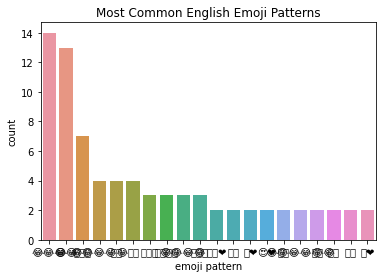

In [12]:
sns.barplot(x='emoji pattern', y = 'count', data = en_df_pattern_count[:20]).set(title='Most Common English Emoji Patterns')
print(list(en_df_pattern_count[:20]['emoji pattern']))

['😂😂😂', '😂😂😂😂', '😂😂', '👏👏', '😂😂😂😂😂', '🔥🔥🔥', '👏👏👏', '🔥🔥', '🤦🏻', '😢😢😢', '🔥🔥🔥🔥', '😂😂😂😂😂😂😂😂', '😍😍', '👏👏👏👏', '🤷🏼', '😍😍😍', '🙌🔥', '😍❤', '🛫🛬🏠', '👋🏻']


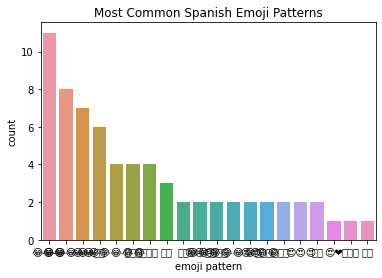

In [13]:
sns.barplot(x='emoji pattern', y = 'count', data = es_df_pattern_count[:20]).set(title='Most Common Spanish Emoji Patterns')
print(list(es_df_pattern_count[:20]['emoji pattern']))

### Find Intersection and Differences

In [14]:
common = set(es_df_count['emoji']).intersection(set(en_df_count['emoji']))
common

{'0',
 '1',
 '6',
 'U',
 '\\',
 'a',
 'e',
 'f',
 '☝',
 '☺',
 '♀',
 '♂',
 '♥',
 '⚽',
 '✌',
 '❤',
 '🌈',
 '🍷',
 '🏆',
 '🏳',
 '🏻',
 '🏼',
 '🏾',
 '🐐',
 '👋',
 '👌',
 '👍',
 '👎',
 '👏',
 '👐',
 '💀',
 '💙',
 '💚',
 '💛',
 '💜',
 '💥',
 '💪',
 '💯',
 '🔥',
 '😁',
 '😂',
 '😅',
 '😇',
 '😉',
 '😌',
 '😍',
 '😎',
 '😏',
 '😘',
 '😠',
 '😡',
 '😢',
 '😭',
 '😮',
 '🙄',
 '🙌',
 '🙏',
 '🤍',
 '🤐',
 '🤔',
 '🤣',
 '🤦',
 '🤨',
 '🤫',
 '🤷',
 '🥇',
 '🥱',
 '🥲',
 '🥶',
 '🦅',
 '🩹'}

In [15]:
def language_only(emoji_list):
    only = []
    for emoji in emoji_list:
        if emoji not in common:
            only.append(emoji)
    return only

In [16]:
English_only = language_only(en_df_count['emoji'])
English_only

['🤬',
 '😫',
 '😊',
 '✨',
 '🤗',
 '☕',
 '🫂',
 '❌',
 '🏃',
 '⚧',
 '🤪',
 '🥺',
 '9',
 '😝',
 '😆',
 '😄',
 '🤟',
 '😀',
 '🤭',
 '🏽',
 '👮',
 '7',
 '😐',
 '😬',
 '🍳',
 '👩',
 '🎠',
 '🚶',
 '😤',
 '😣',
 '🙃',
 '🎥',
 '🏴',
 '🕺',
 '🌍',
 '😩',
 '🚮']

In [17]:
Spanish_only = language_only(es_df_count['emoji'])
Spanish_only

['🕷',
 '🔴',
 '😒',
 '💜',
 '🤙',
 '🥳',
 '🤟',
 '🔟',
 '🌎',
 '⚪',
 '😥',
 '😨',
 '😳',
 '🖐',
 '😻',
 '☘',
 '👐',
 '💤',
 '🤘',
 '☹',
 '👹',
 '💕',
 '🟡',
 '✅',
 '🔆',
 '⚡',
 '🛬',
 '🌚',
 '🫀',
 '🤑',
 '✝',
 '🎈',
 '😸',
 '🌍',
 '🍀',
 '⚫',
 '🥂',
 '📝',
 '🎶',
 '😵',
 '🦵',
 '🎎',
 '🏯',
 '✍',
 '🕸',
 '😓',
 '⏱',
 '🦌',
 '🔵',
 '🤜',
 '🤛',
 '😜',
 '🥤',
 '🩹',
 '👃',
 '🧙',
 '🤌',
 '😯']